# KPI Ticket Distribution


Import the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


We read the p.csv that consists of our cleaned data and convert it into a pandas dataframe.


In [2]:
data = pd.read_csv("csvs/p.csv", index_col=0)
data


start_time             end_time  start_station_id  \
0       2018-01-01 00:24:00  2018-01-01 00:42:00              3124   
1       2018-01-01 00:38:00  2018-01-01 10:10:00              3023   
2       2018-01-01 00:48:00  2018-01-01 01:10:00              3026   
3       2018-01-01 01:03:00  2018-01-01 01:24:00              3045   
4       2018-01-01 01:05:00  2018-01-01 01:09:00              3115   
...                     ...                  ...               ...   
671813  2018-12-31 23:18:00  2019-01-01 00:04:00              3037   
671814  2018-12-31 23:25:00  2019-01-01 00:06:00              3168   
671815  2018-12-31 23:26:00  2019-01-01 06:44:00              3026   
671816  2018-12-31 23:33:00  2018-12-31 23:47:00              3063   
671817  2018-12-31 23:39:00  2018-12-31 23:49:00              3007   

        end_station_id  bike_id  user_type              start_station_name  \
0                 3073     3708   Indego30                Race Street Pier   
1                 3066     3288  Indego365              Rittenhouse Square   
2                 3023    11735   Indego30                     2nd & South   
3                 3037     5202   Indego30                   13th & Locust   
4                 3058     5142   Indego30             19th & Girard, PTTI   
...                ...      ...        ...                             ...   
671813            3037    14519   Day Pass  Pennsylvania Convention Center   
671814            3168    11891   Indego30                   20th & Sansom   
671815            3026     5410   Indego30                     2nd & South   
671816            3150     2701   Day Pass                     17th & Pine   
671817            3049     3471   Indego30          11th & Pine, Kahn Park   

                             end_station_name  
0                         9th & Spring Garden  
1                              19th & Lombard  
2                          Rittenhouse Square  
3              Pennsylvania Convention Center  
4                            20th & Fairmount  
...                                       ...  
671813         Pennsylvania Convention Center  
671814                          20th & Sansom  
671815                            2nd & South  
671816  15th & Castle, DiSilvestro Playground  
671817                        Foglietta Plaza  

[668591 rows x 8 columns]

Cast the series 'start_time' and 'end_time' to pandas.datetime objects, as well as 'dayofweek_start' and 'dayofweek_end' to datetime.dayofweek and finally 'month_start' and 'month_end' to datetime.month


In [3]:
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce')

data['dayofweek_start'] = data.start_time.dt.dayofweek
data['dayofweek_end'] = data.end_time.dt.dayofweek

data['month_start'] = data.start_time.dt.month
data['month_end'] = data.end_time.dt.month


data


start_time            end_time  start_station_id  \
0      2018-01-01 00:24:00 2018-01-01 00:42:00              3124   
1      2018-01-01 00:38:00 2018-01-01 10:10:00              3023   
2      2018-01-01 00:48:00 2018-01-01 01:10:00              3026   
3      2018-01-01 01:03:00 2018-01-01 01:24:00              3045   
4      2018-01-01 01:05:00 2018-01-01 01:09:00              3115   
...                    ...                 ...               ...   
671813 2018-12-31 23:18:00 2019-01-01 00:04:00              3037   
671814 2018-12-31 23:25:00 2019-01-01 00:06:00              3168   
671815 2018-12-31 23:26:00 2019-01-01 06:44:00              3026   
671816 2018-12-31 23:33:00 2018-12-31 23:47:00              3063   
671817 2018-12-31 23:39:00 2018-12-31 23:49:00              3007   

        end_station_id  bike_id  user_type              start_station_name  \
0                 3073     3708   Indego30                Race Street Pier   
1                 3066     3288  Indego365              Rittenhouse Square   
2                 3023    11735   Indego30                     2nd & South   
3                 3037     5202   Indego30                   13th & Locust   
4                 3058     5142   Indego30             19th & Girard, PTTI   
...                ...      ...        ...                             ...   
671813            3037    14519   Day Pass  Pennsylvania Convention Center   
671814            3168    11891   Indego30                   20th & Sansom   
671815            3026     5410   Indego30                     2nd & South   
671816            3150     2701   Day Pass                     17th & Pine   
671817            3049     3471   Indego30          11th & Pine, Kahn Park   

                             end_station_name  dayofweek_start  dayofweek_end  \
0                         9th & Spring Garden                0              0   
1                              19th & Lombard                0              0   
2                          Rittenhouse Square                0              0   
3              Pennsylvania Convention Center                0              0   
4                            20th & Fairmount                0              0   
...                                       ...              ...            ...   
671813         Pennsylvania Convention Center                0              1   
671814                          20th & Sansom                0              1   
671815                            2nd & South                0              1   
671816  15th & Castle, DiSilvestro Playground                0              0   
671817                        Foglietta Plaza                0              0   

        month_start  month_end  
0                 1          1  
1                 1          1  
2                 1          1  
3                 1          1  
4                 1          1  
...             ...        ...  
671813           12          1  
671814           12          1  
671815           12          1  
671816           12         12  
671817           12         12  

[668591 rows x 12 columns]

Append a series containing the user types and their according numbers for each month to the dataframe 'df' which will be used to create the plot later on.


In [4]:
switcher = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df = pd.DataFrame()

i = 1
while i <= 12:
    data_in_month_i = data[data["month_start"] == i]
    user_type_grouped_in_month_i = data_in_month_i.groupby(
        "user_type")["month_start"].describe()["count"]
    new_line = pd.Series(user_type_grouped_in_month_i, name=switcher.get(i))
    df = df.append(new_line, ignore_index=False)
    i = i+1


Create a stacked bar graph.


In [5]:
# some user types are not in every month, so NaN needs to be replaced, to ensure the bar graph working properly
df['Indego30'] = df['Indego30'].fillna(0)
df['Indego365'] = df['Indego365'].fillna(0)
df['IndegoFlex'] = df['IndegoFlex'].fillna(0)
df['One Day Pass'] = df['One Day Pass'].fillna(0)
df['Walk-up'] = df['Walk-up'].fillna(0)
df['Day Pass'] = df['Day Pass'].fillna(0)


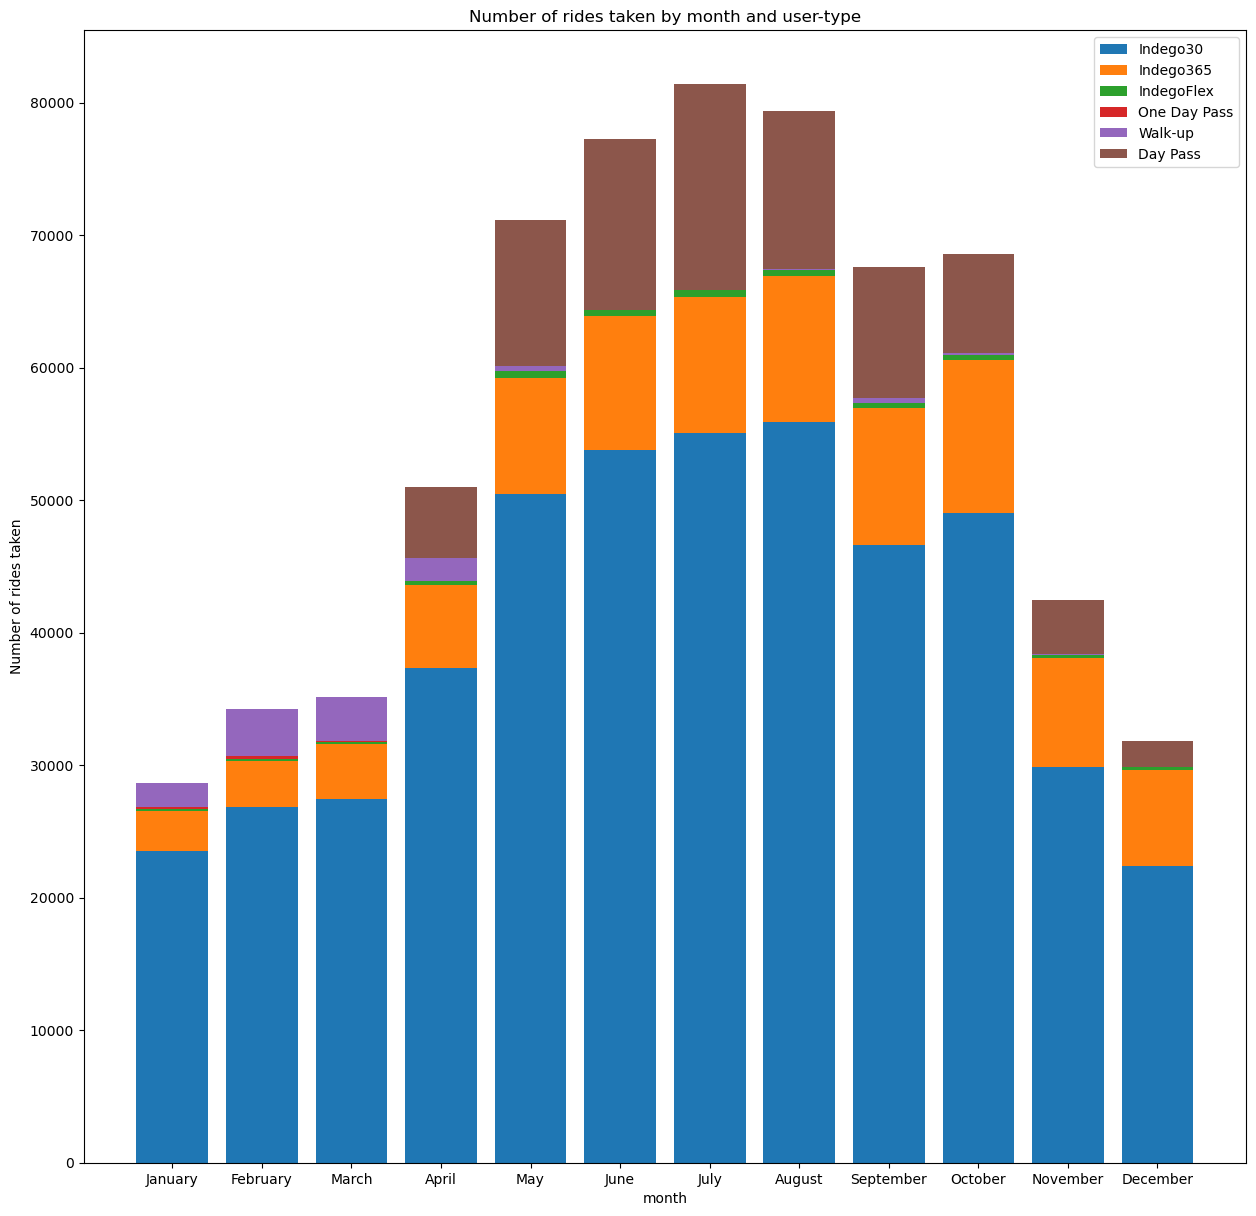

In [6]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 15)
fig.set_dpi(100)

ax.bar(df.index, df['Indego30'], label="Indego30")
ax.bar(df.index, df['Indego365'], label="Indego365", bottom=df['Indego30'])
ax.bar(df.index, df['IndegoFlex'], label="IndegoFlex",
       bottom=df['Indego30'] + df['Indego365'])
ax.bar(df.index, df['One Day Pass'], label="One Day Pass",
       bottom=df['Indego30'] + df['Indego365'] + df['IndegoFlex'])
ax.bar(df.index, df['Walk-up'],  label="Walk-up",
       bottom=df['Indego30'] + df['Indego365'] + df['IndegoFlex'] + df['One Day Pass'])
ax.bar(df.index, df['Day Pass'],  label="Day Pass",  bottom=df['Indego30'] +
       df['Indego365'] + df['IndegoFlex'] + df['One Day Pass'] + df['Walk-up'])

ax.set_ylabel('Number of rides taken')
ax.set_xlabel('month')
ax.set_title('Number of rides taken by month and user-type')
ax.legend()


Indego30 makes up the majority of trips. Indego365 and Day Pass are also fairly popular. Other ticket types are much less common.

It can also be seen that One Day Pass got replaced with Day Pass, starting april. The Day Pass also seems to have absorbed most of the Walk-up users, shortly after its introduction.